In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
product = pd.read_csv('product.csv', on_bad_lines='skip')
click_strem = pd.read_csv('click_stream_new.csv')
customer = pd.read_csv('customer.csv')
transaction = pd.read_csv('transaction_new.csv')

### click으로 EDA

In [4]:
# click_stream 정보
click_strem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   session_id       object 
 1   event_name       object 
 2   event_time       object 
 3   event_id         object 
 4   traffic_source   object 
 5   product_id       float64
 6   quantity         float64
 7   item_price       float64
 8   payment_status   object 
 9   search_keywords  object 
 10  promo_code       object 
 11  promo_amount     float64
dtypes: float64(4), object(8)
memory usage: 1.1+ GB


In [5]:
click_strem['event_name'].value_counts()

event_name
CLICK          2498038
HOMEPAGE       2487126
ADD_TO_CART    1937157
SCROLL         1663571
ITEM_DETAIL    1290396
SEARCH         1173266
BOOKING         852582
PROMO_PAGE      604931
ADD_PROMO       326535
Name: count, dtype: int64

In [6]:
click_strem['session_id'].value_counts()

session_id
65383bfb-5535-445f-ab52-aec4658eb0bd    650
eb310630-8d65-4c59-8a33-a386b891ec74    650
d46877e2-9e20-4277-8698-647dee913a14    539
12489f38-0fc1-4b80-9fe4-b267c4413ae7    539
c22cb71e-f232-4930-9d59-85340bd98336    519
                                       ... 
e9e6daf7-9369-4261-b51f-049d7736ead4      2
663c5044-5144-4d83-b34a-0573aa36cee8      2
582cf298-4b62-4ff8-8d50-2a371ec8608f      2
a3454191-6eeb-4b8a-b8bd-45cd0824ab1b      2
fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c      2
Name: count, Length: 895203, dtype: int64

In [7]:
# 세션 아이디로 어떤 행동 있었는지 확인
click_strem[click_strem['session_id']=='fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c']

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
click_strem[click_strem['session_id']=='65383bfb-5535-445f-ab52-aec4658eb0bd']

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
7252865,65383bfb-5535-445f-ab52-aec4658eb0bd,HOMEPAGE,2021-04-19T07:56:25.706561Z,f10d4b1a-b44f-4b26-a02c-d6a1c46084a1,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7252866,65383bfb-5535-445f-ab52-aec4658eb0bd,ADD_TO_CART,2021-04-21T01:48:02.706561Z,b5eec39e-4ad0-4e90-8473-c47d3d89a78d,MOBILE,39775.0,1.0,178232.0,NaN,NaN,NaN,NaN
7252867,65383bfb-5535-445f-ab52-aec4658eb0bd,ADD_PROMO,2021-04-22T19:37:44.706561Z,7d555d88-7e85-4906-9b77-f79abd7607eb,MOBILE,NaN,NaN,NaN,NaN,NaN,BUYMORE,6903.0
7252868,65383bfb-5535-445f-ab52-aec4658eb0bd,BOOKING,2021-05-10T06:34:43.706561Z,140fdbdd-f605-4911-bc27-1ca5ba0c9b87,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN
7252869,65383bfb-5535-445f-ab52-aec4658eb0bd,CLICK,2021-04-21T01:40:32.706561Z,b140ca89-a6d1-4875-ade8-f87dbfb4bcfa,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7253510,65383bfb-5535-445f-ab52-aec4658eb0bd,HOMEPAGE,2021-06-29T06:09:24.706561Z,397ffaf3-9de1-46d3-8b22-0baa4cc7f2ea,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7253511,65383bfb-5535-445f-ab52-aec4658eb0bd,ITEM_DETAIL,2021-06-29T08:00:56.706561Z,dfb7493c-9dfb-452b-8ce9-985d89b25c15,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7253512,65383bfb-5535-445f-ab52-aec4658eb0bd,ITEM_DETAIL,2021-06-29T09:56:14.706561Z,399536b9-15b4-45c4-8dc2-0e786fa0fdad,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7253513,65383bfb-5535-445f-ab52-aec4658eb0bd,PROMO_PAGE,2021-06-29T11:49:51.706561Z,6309d744-2878-4fea-8c89-545f654c1531,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# 구매가 확정된 event의 디바이스
click_strem[click_strem['payment_status']=='Success']['traffic_source'].value_counts()

traffic_source
MOBILE    734233
WEB        81729
Name: count, dtype: int64

In [11]:
# 세번의 클릭으로 구매하는 경우가 있는지?
click_stream_counts = click_strem['session_id'].value_counts()
click_stream_filtered = click_strem[click_strem['session_id'].isin(click_stream_counts[click_stream_counts == 3].index)]

In [12]:
# 3명정도는 구매 -> 두번만에는 아니어도 세번만에는 구매하는 사람 존재
click_stream_filtered[click_stream_filtered['payment_status']=='Success']

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
3068383,21acec27-7cae-4f12-9630-f735a4c3fe46,BOOKING,2022-07-18T18:37:12.295196Z,61cbcc18-06cc-46e7-88a7-079378243e0a,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN
7185313,0b888405-840e-40b2-8224-a2888b321591,BOOKING,2022-07-27T20:14:30.157333Z,f9639697-e2c2-4bee-b2c8-962bb81e91e6,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN
11064039,71621c3c-5eca-4cfe-aa0d-5d34d6dedfdd,BOOKING,2022-07-30T04:59:01.762313Z,7fdd920f-0b93-4f4e-9f72-d631e59df3e4,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN


In [13]:
click = click_strem.copy()

In [14]:
# 페이지 방문자 수 
click['session_id'].nunique()

895203

In [15]:
# Booking까지 갔어도 status가 failed인 경우가 존재
click[(click['event_name']=='BOOKING')& (click['payment_status'] != 'Success')]

# status가 success인 경우가 구매자가 된다
success_customer = click[(click['event_name']=='BOOKING')]

In [16]:
# 구매자 수
success_customer['session_id'].nunique()

852582

In [17]:
'''
# 구매 전환율
- 서비스를 방문한 사람이 구매를 한 비율
- 구매자 수 / 방문자 수
'''
# 페이지 방문자 수 
visitor = click['session_id'].nunique()

# 구매자 수
buyer = success_customer['session_id'].nunique()

# 구매전환율
buyer / visitor

0.9523895697400477

In [18]:
click[click['session_id'] == '21acec27-7cae-4f12-9630-f735a4c3fe46']

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
3068381,21acec27-7cae-4f12-9630-f735a4c3fe46,HOMEPAGE,2022-07-18T18:37:09.295196Z,860cb417-6d4f-4f92-84b4-dc46776a751c,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3068382,21acec27-7cae-4f12-9630-f735a4c3fe46,ADD_TO_CART,2022-07-18T18:37:09.295196Z,c7616fc8-5749-429f-8b55-bb53fc8ba0b4,MOBILE,7937.0,1.0,246060.0,NaN,NaN,NaN,NaN
3068383,21acec27-7cae-4f12-9630-f735a4c3fe46,BOOKING,2022-07-18T18:37:12.295196Z,61cbcc18-06cc-46e7-88a7-079378243e0a,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN


### Product 관점에서 분석

In [19]:
product

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [20]:
product.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,44424.0,NaN,NaN,NaN,29696.334301,17049.490518,1163.0,14768.75,28618.5,44683.25,60000.0
gender,44424,5,Men,22147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
masterCategory,44424,7,Apparel,21397,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subCategory,44424,45,Topwear,15402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
articleType,44424,143,Tshirts,7067,NaN,NaN,NaN,NaN,NaN,NaN,NaN
baseColour,44409,46,Black,9728,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,44403,4,Summer,21472,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,44423.0,NaN,NaN,NaN,2012.806497,2.12648,2007.0,2011.0,2012.0,2015.0,2019.0
usage,44107,8,Casual,34406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
productDisplayName,44417,31121,Lucera Women Silver Earrings,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [22]:
# basecolor 결측치는 display이름으로 채우기 가능
product[product['baseColour'].isnull()]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
6206,11293,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Texas Jeans
9516,41347,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Black Texas Jeans
12763,11288,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Texas Jeans
14291,30991,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
15526,57698,Women,Personal Care,Skin,Face Moisturisers,NaN,Spring,2017.0,Casual,Lotus Herbals Quincenourish Quince Seed Nouris...
15708,41355,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Millard Jeans
17268,43122,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,GUESS Man Eau De Toilette 75 ml
17639,45687,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
20209,11309,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Floyd Jeans
23484,45698,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN


In [23]:
# 지우는게 낫지 않을까? display name조차 모르는걸,,,? 그런 경우 다른 컬럼에도 nan값임
product[product['productDisplayName'].isnull()]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
3677,42878,Women,Accessories,Bags,Clutches,Maroon,Summer,2012.0,Casual,NaN
14291,30991,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
17639,45687,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
22089,42863,Women,Accessories,Bags,Clutches,Brown,Summer,2012.0,Casual,NaN
23484,45698,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
37531,30992,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
40675,43119,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN


In [24]:
transaction.head(2)

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526


In [25]:
product_rename = product.rename(columns={'id': 'product_id'})

In [26]:
# product_id로 product와 transaction 합치기
merged_pro_trans = transaction.merge(product_rename, on='product_id', how='left')

In [27]:
merged_pro_trans.head(2)

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,item_price,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,...,191247,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,...,145526,Men,Apparel,Topwear,Sweaters,Green,Fall,2011.0,Casual,Puma Men Knitted Vest Green Sweater


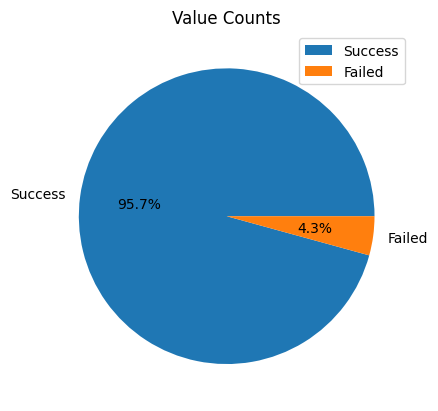

In [28]:
counts = merged_pro_trans['payment_status'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')

plt.title('Value Counts')
plt.legend()
plt.ylabel('')

plt.show()

#### 거래 성공 기준

In [29]:
# 거래에 성공한 것 기준
success_transaction = merged_pro_trans[merged_pro_trans['payment_status']=='Success']


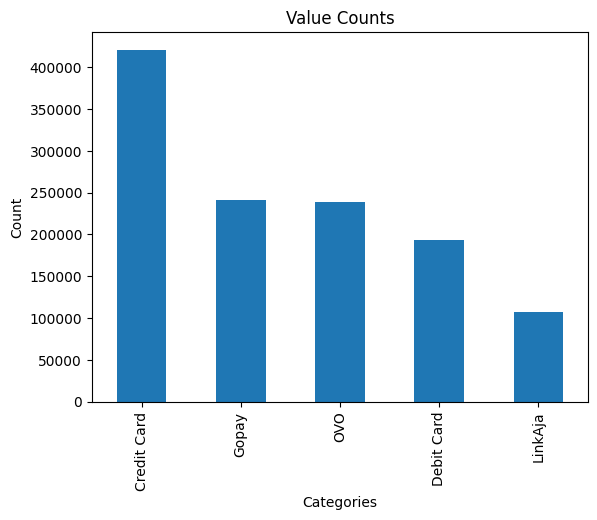

In [30]:
# 거래 성공 > 결제수단
counts = success_transaction['payment_method'].value_counts()
counts.plot(kind='bar')

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Value Counts')

plt.show()

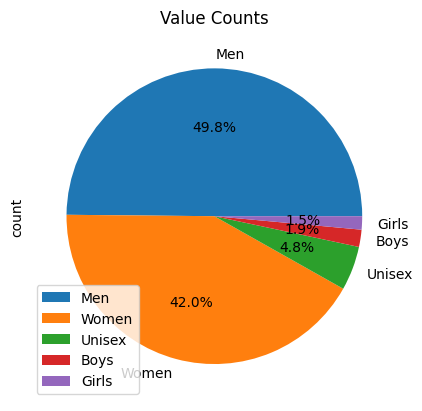

In [31]:
counts = success_transaction['gender'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')

plt.title('Value Counts')
plt.legend()
plt.show()

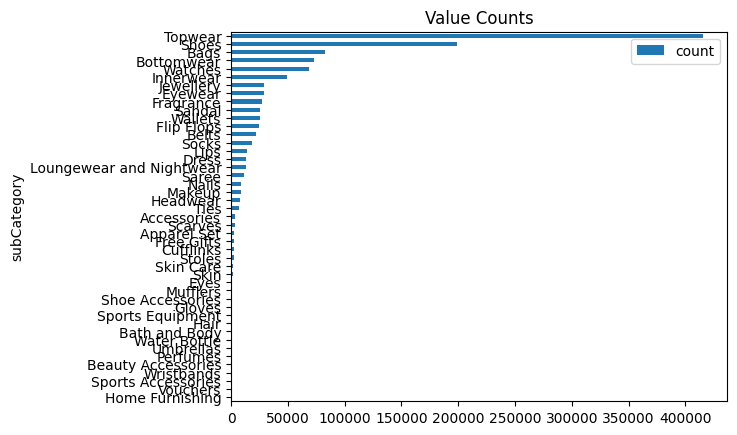

In [32]:
counts = success_transaction['subCategory'].value_counts().sort_values(ascending=True)
counts.plot(kind='barh')

plt.title('Value Counts')
plt.legend()

plt.show()

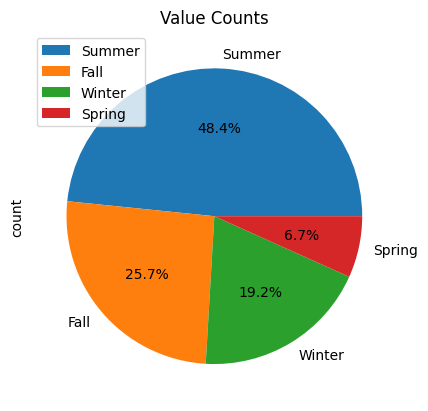

In [33]:
counts = success_transaction['season'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')

plt.title('Value Counts')
plt.legend()

plt.show()

#### 거래 실패 기준

In [34]:
# 거래에 실패한 것 기준
failed_transaction = merged_pro_trans[merged_pro_trans['payment_status']=='Failed']

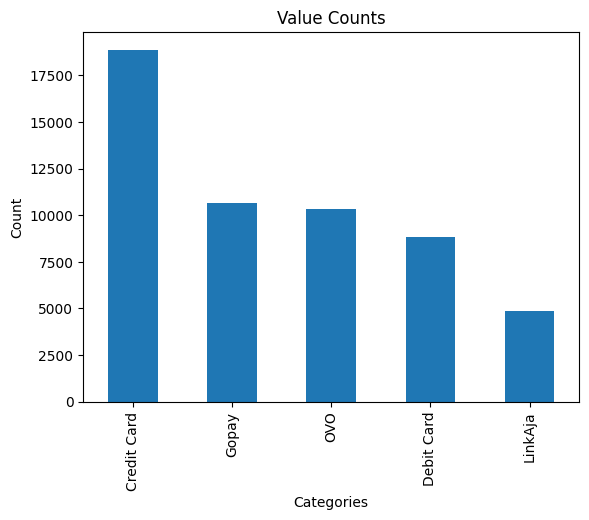

In [35]:
# 거래 실패 > 결제수단
counts = failed_transaction['payment_method'].value_counts()
counts.plot(kind='bar')

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Value Counts')

plt.show()

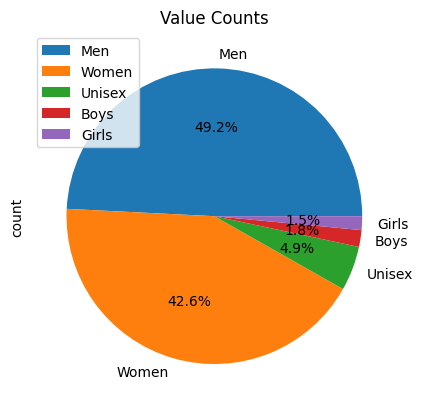

In [36]:
counts = failed_transaction['gender'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')

plt.title('Value Counts')
plt.legend()
plt.show()

### Product year


In [37]:
product

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [38]:
product[product['year'].isnull()]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
21272,53781,Men,Apparel,Topwear,Tshirts,Blue,NaN,NaN,Sports,Puma Men Blue Sless Round Neck T-shirt


In [39]:
product_new=product.copy()

In [40]:
product_new['year'] = product_new['year'].fillna(0).astype('int').replace({0: np.nan})

In [41]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [42]:
product['year'].unique()

array([2011., 2012., 2016., 2017., 2015., 2014., 2010., 2013., 2018.,
       2019., 2007., 2009., 2008.,   nan])

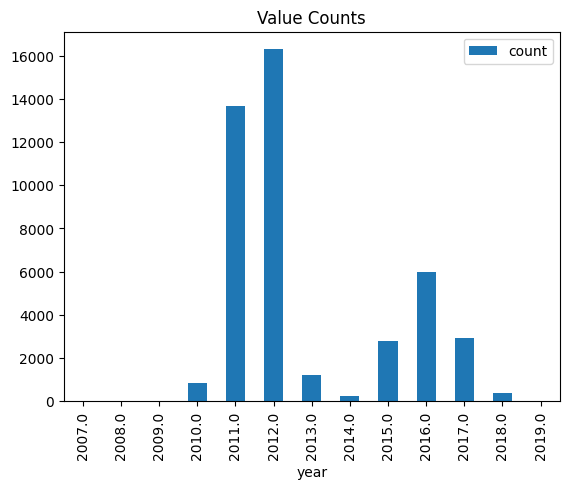

In [43]:
# 'year' 열을 날짜형으로 변경
# product['year'] = pd.to_datetime(product['year'], format='%YYYY')

# 'year' 열을 기준으로 값 세기 및 정렬
counts = product['year'].value_counts().sort_index()

counts.plot(kind='bar')

plt.title('Value Counts')
plt.legend()
plt.show()

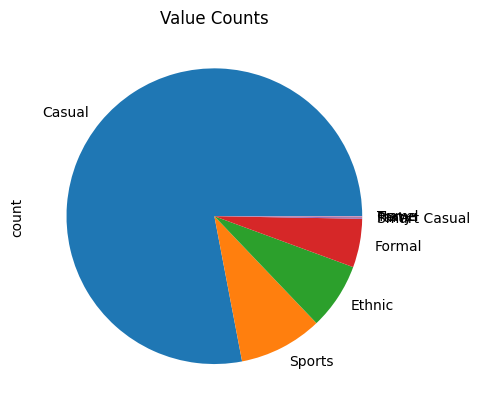

In [44]:
# 상품의 용도에 따른 상품 개수
counts = product['usage'].value_counts()
counts.plot(kind='pie')

plt.title('Value Counts')
plt.show()

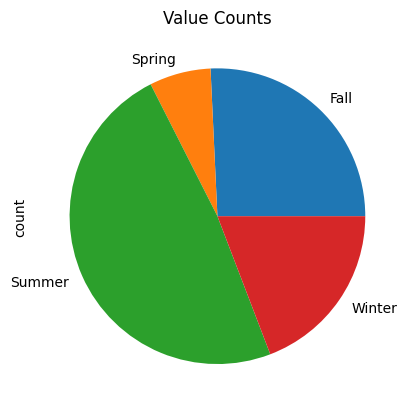

In [45]:
# 계절에 따른 상품 개수
counts = product['season'].value_counts().sort_index()

counts.plot(kind='pie')

plt.title('Value Counts')
plt.show()

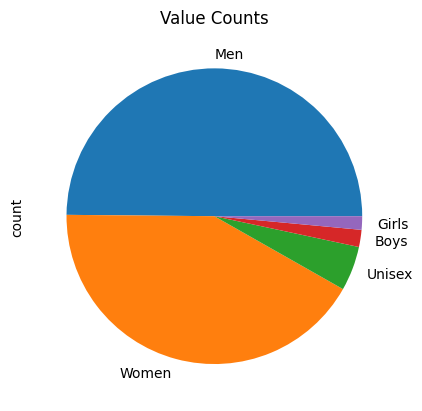

In [46]:
# 성별에 따른 상품 개수
counts = product['gender'].value_counts()

counts.plot(kind='pie')

plt.title('Value Counts')
plt.show()

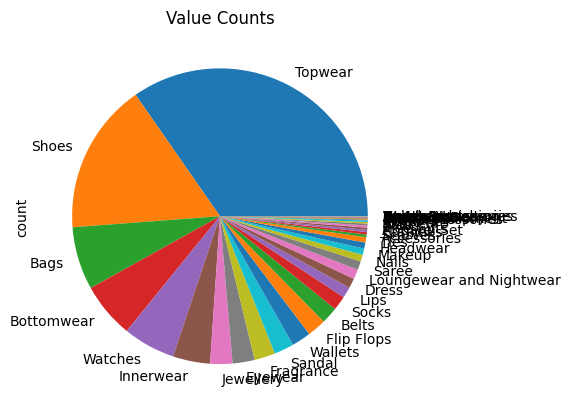

In [47]:
# 세부 카테고리별 상품 개수
counts = product['subCategory'].value_counts()

counts.plot(kind='pie')

plt.title('Value Counts')
plt.show()

In [48]:
# 중복되는행 없음
product[product.duplicated()==True]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName


In [49]:
# merged_pro_trans : product + transaction
merged_pro_trans['created_at']

0          2018-07-29T15:22:01.458193Z
1          2018-07-30T12:40:22.365620Z
2          2018-09-15T11:51:17.365620Z
3          2018-11-01T11:23:48.365620Z
4          2018-12-18T11:20:30.365620Z
                      ...             
1254580    2021-09-21T22:10:05.074873Z
1254581    2021-12-09T07:35:18.222046Z
1254582    2021-12-11T01:20:36.944593Z
1254583    2019-12-18T11:01:09.623382Z
1254584    2019-12-19T12:47:14.701215Z
Name: created_at, Length: 1254585, dtype: object

In [50]:
# 날짜와 시간 분리 위함
merged_pro_trans['created_at'][0].split('T')

['2018-07-29', '15:22:01.458193Z']

In [51]:
merged_pro_trans

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,item_price,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,...,191247,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,...,145526,Men,Apparel,Topwear,Sweaters,Green,Fall,2011.0,Casual,Puma Men Knitted Vest Green Sweater
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,...,135174,Women,Accessories,Bags,Handbags,Purple,Summer,2012.0,Casual,Kiara Women Purple & Yellow Handbag
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,...,271012,Women,Apparel,Topwear,Sweaters,Red,Fall,2011.0,Casual,Wrangler Women Cable Red Sweater
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,...,198753,Women,Personal Care,Lips,Lip Liner,Brown,Spring,2017.0,Casual,Lakme Absolute Forever Silk Chestnut Lip Liner 03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254580,2021-09-21T22:10:05.074873Z,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,Debit Card,Failed,0,NaN,0,2021-09-27T00:43:40.992167Z,...,113410,Men,Apparel,Topwear,Tshirts,White,Summer,2012.0,Casual,Nike Men Printed White T-shirt
1254581,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,...,354213,Men,Apparel,Topwear,Jackets,Blue,Summer,2011.0,Casual,ADIDAS Men Solid Blue Jacket
1254582,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,...,288835,Men,Footwear,Shoes,Casual Shoes,White,Fall,2011.0,Casual,Numero Uno Men White Casual Shoes
1254583,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,...,188646,Men,Apparel,Bottomwear,Trousers,Beige,Fall,2011.0,Casual,Scullers Men Rugged Chinos Beige Trousers


In [52]:
# 날짜,시간 분리
merged_pro_trans['date_str'], merged_pro_trans['time_str'] = merged_pro_trans['created_at'].split('T')

length = len(merged_pro_trans)
merged_pro_trans['date_str'] = 0
merged_pro_trans['time_str'] = 0

for i in range (length) :
    date_time = merged_pro_trans['created_at'][i]
    merged_pro_trans['date_str'][i], merged_pro_trans['time_str'][i]= date_time.split('T')

C:\Users\user\AppData\Local\Temp\ipykernel_2944\2185411309.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_pro_trans['date_str'][i], merged_pro_trans['time_str'][i]= date_time.split('T')
C:\Users\user\AppData\Local\Temp\ipykernel_2944\2185411309.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_pro_trans['date_str'][i], merged_pro_trans['time_str'][i]= date_time.split('T')


In [53]:
# 확인
merged_pro_trans['date_str'][3][:4]

'2018'

In [54]:
# 연도만 분리
length = len(merged_pro_trans)
merged_pro_trans['date_year'] = 0

for i in range (length) :
    year = merged_pro_trans['date_str'][i][:4]
    merged_pro_trans['date_year'][i] = year
    #merged_pro_trans['date_str'][i], merged_pro_trans['time_str'][i]= date_time.split('T')
    #print(year)

C:\Users\user\AppData\Local\Temp\ipykernel_2944\2964797028.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_pro_trans['date_year'][i] = year


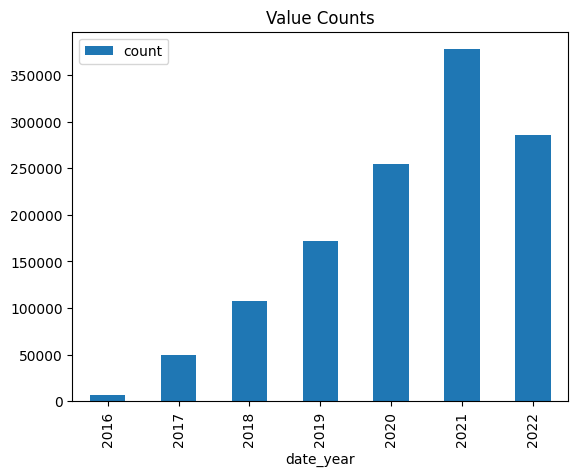

In [55]:
# 연도별 
counts = merged_pro_trans['date_year'].value_counts().sort_index()
counts.plot(kind='bar')

plt.title('Value Counts')
plt.legend()
plt.show()

In [56]:
# 년도별 개수
merged_pro_trans.groupby('date_year').size()

date_year
2016      7039
2017     50171
2018    107789
2019    171472
2020    254983
2021    377427
2022    285704
dtype: int64

In [57]:
merged_pro_trans[merged_pro_trans['date_year']=='2021']

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,subCategory,articleType,baseColour,season,year,usage,productDisplayName,date_str,time_str,date_year
31,2021-01-08T11:24:54.365620Z,4774,752e6f17-216a-4801-b0b4-68908857f584,8f3c25e3-6529-469f-9b47-2acac609d93a,Credit Card,Success,0,NaN,0,2021-01-11T18:15:58.746308Z,...,Topwear,Shirts,Purple,Summer,2012.0,Formal,John Miller Men Purple Shirt,2021-01-08,11:24:54.365620Z,2021
32,2021-02-24T10:35:41.365620Z,4774,3e8d1505-80ad-4438-a82b-2a017e0c551e,57b6d108-9ec4-48ef-8d66-cdd17c4942ba,Gopay,Success,3855,BUYMORE,10000,2021-02-28T20:19:37.594671Z,...,Topwear,Kurtas,Green,Summer,2011.0,Ethnic,W Women Printed Green Kurtas,2021-02-24,10:35:41.365620Z,2021
33,2021-04-12T11:07:35.365620Z,4774,19748870-3690-4fc3-8713-ffb4bca16c94,e8665111-3196-4edf-9a30-d1f2a4945b41,Credit Card,Success,0,NaN,0,2021-04-14T11:49:09.838274Z,...,Shoes,Heels,Red,Winter,2015.0,Casual,Catwalk Women Red Flats,2021-04-12,11:07:35.365620Z,2021
34,2021-05-29T10:59:02.365620Z,4774,e4a15e0c-8848-49c4-8648-8e5e7bf8e9a0,a4ad7fb7-6a09-450b-aa8d-97e28c0cda20,Credit Card,Success,0,NaN,10000,2021-06-03T18:15:49.265999Z,...,Topwear,Tshirts,Black,Summer,2011.0,Sports,Nike Men's Challenger Logo Black T-shirt,2021-05-29,10:59:02.365620Z,2021
35,2021-07-15T11:06:17.365620Z,4774,57b61173-4837-449a-a5fb-22b0cd07d56d,b0ab036c-5c29-417b-9c2e-1a41d872028a,LinkAja,Success,6325,AZ2022,10000,2021-07-17T19:21:39.314719Z,...,Loungewear and Nightwear,Lounge Pants,Black,Summer,2011.0,Sports,Puma Women Black Essential Skinny Capris,2021-07-15,11:06:17.365620Z,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254570,2021-09-10T14:58:05.098790Z,37287,cecf50f2-ab2f-4523-971d-c701df7c28ff,f86dad5c-f2ad-45ff-ab16-2afba8fae58d,OVO,Success,5060,AZ2022,10000,2021-09-15T06:56:55.468310Z,...,Topwear,Tshirts,Blue,Summer,2012.0,Casual,Mark Taylor Men Printed Blue T-shirt,2021-09-10,14:58:05.098790Z,2021
1254571,2021-12-27T20:11:09.098790Z,37287,7a6ecaf3-316d-40b2-b366-8f670d669c30,8d9f019f-600c-439e-b302-0779540e0561,OVO,Success,2603,XX2022,25000,2022-01-01T20:00:54.420462Z,...,Topwear,Sweaters,Purple,Summer,2011.0,Casual,United Colors of Benetton Men Solid Purple Swe...,2021-12-27,20:11:09.098790Z,2021
1254580,2021-09-21T22:10:05.074873Z,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,Debit Card,Failed,0,NaN,0,2021-09-27T00:43:40.992167Z,...,Topwear,Tshirts,White,Summer,2012.0,Casual,Nike Men Printed White T-shirt,2021-09-21,22:10:05.074873Z,2021
1254581,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,...,Topwear,Jackets,Blue,Summer,2011.0,Casual,ADIDAS Men Solid Blue Jacket,2021-12-09,07:35:18.222046Z,2021


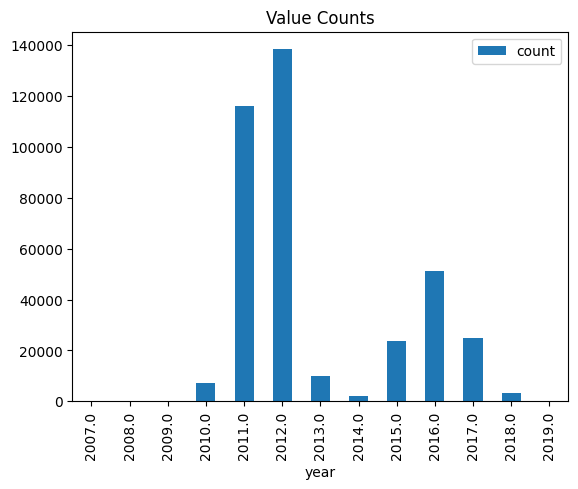

In [58]:
sale_2021 = merged_pro_trans[merged_pro_trans['date_year']=='2021']
counts = sale_2021['year'].value_counts().sort_index()

counts.plot(kind='bar')

plt.title('Value Counts')
plt.legend()
plt.show()

In [59]:
merged_pro_trans.head(5).T

,0,1,2,3,4
created_at,2018-07-29T15:22:01.458193Z,2018-07-30T12:40:22.365620Z,2018-09-15T11:51:17.365620Z,2018-11-01T11:23:48.365620Z,2018-12-18T11:20:30.365620Z
customer_id,5868,4774,4774,4774,4774
booking_id,186e2bee-0637-4710-8981-50c2d737bc42,caadb57b-e808-4f94-9e96-8a7d4c9898db,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,f5e530a7-4350-4cd1-a3bc-525b5037bcab,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2
session_id,3abaa6ce-e320-4e51-9469-d9f3fa328e86,2ee5ead1-f13e-4759-92df-7ff48475e970,93325fb6-eb00-4268-bb0e-6471795a0ad0,bcad5a61-1b67-448d-8ff4-781d67bc56e4,df1042ab-13e6-4072-b9d2-64a81974c51a
payment_method,Debit Card,Credit Card,OVO,Credit Card,Credit Card
payment_status,Success,Success,Success,Success,Success
promo_amount,1415,0,0,0,0
promo_code,WEEKENDSERU,NaN,NaN,NaN,NaN
shipment_fee,10000,10000,10000,0,0
shipment_date_limit,2018-08-03T05:07:24.812676Z,2018-08-03T01:29:03.415705Z,2018-09-18T08:41:49.422380Z,2018-11-05T17:42:27.954235Z,2018-12-23T17:24:07.361785Z


In [60]:
merged_pro_trans['date_str'][2][5:7]

'09'

In [61]:
# 월만 분리
length = len(merged_pro_trans)
merged_pro_trans['date_month'] = 0

for i in range (length) :
    month = merged_pro_trans['date_str'][i][5:7]
    merged_pro_trans['date_month'][i] = month

C:\Users\user\AppData\Local\Temp\ipykernel_2944\263881431.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_pro_trans['date_month'][i] = month


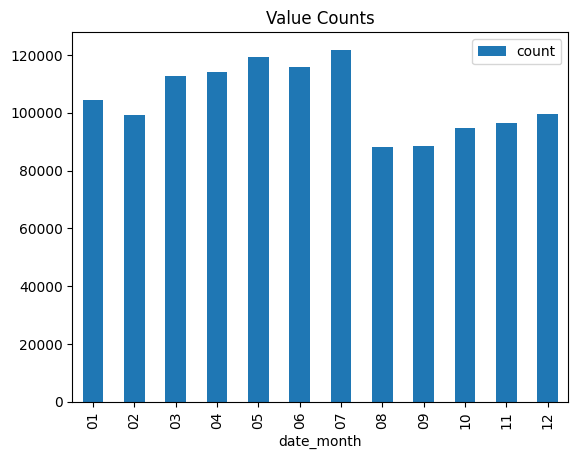

In [62]:
# 주문 month
counts = merged_pro_trans['date_month'].value_counts().sort_index()
counts.plot(kind='bar')

plt.title('Value Counts')
plt.legend()
plt.show()

In [63]:
# 거래 성공, 실패 기준 df 나누기
success_merged_pro_trans = merged_pro_trans[merged_pro_trans['payment_status']=='Success']
failed_merged_pro_trans = merged_pro_trans[merged_pro_trans['payment_status']=='Failed']

In [64]:
# 중복 개수
merged_pro_trans['customer_id'].duplicated().sum()

1203880

In [65]:
# 상품을 조회한 사용자 수 (중복제거)
unique_customers = merged_pro_trans.drop_duplicates(subset='customer_id')
customer_check_counts = unique_customers.groupby('subCategory').size().sort_values(ascending=False)
customer_check_counts

subCategory
Topwear                     17581
Shoes                        8284
Bags                         3494
Bottomwear                   3069
Watches                      2947
Innerwear                    2050
Jewellery                    1216
Eyewear                      1197
Fragrance                    1165
Sandal                       1113
Wallets                      1107
Flip Flops                   1050
Belts                         906
Socks                         779
Lips                          621
Dress                         564
Loungewear and Nightwear      531
Saree                         482
Nails                         377
Makeup                        340
Headwear                      322
Ties                          309
Accessories                   159
Scarves                       155
Free Gifts                    122
Cufflinks                     119
Apparel Set                   119
Stoles                        107
Skin Care                      84
Sk

In [66]:
#pd.set_option('display.max_columns', None)

In [67]:
# customer_id가 4774인 경우 겹치는 행이 많음을 확인 -> 팀회의
success_merged_pro_trans[success_merged_pro_trans['customer_id'] == 4774]

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,articleType,baseColour,season,year,usage,productDisplayName,date_str,time_str,date_year,date_month
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,...,Sweaters,Green,Fall,2011.0,Casual,Puma Men Knitted Vest Green Sweater,2018-07-30,12:40:22.365620Z,2018,07
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,...,Handbags,Purple,Summer,2012.0,Casual,Kiara Women Purple & Yellow Handbag,2018-09-15,11:51:17.365620Z,2018,09
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,...,Sweaters,Red,Fall,2011.0,Casual,Wrangler Women Cable Red Sweater,2018-11-01,11:23:48.365620Z,2018,11
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,...,Lip Liner,Brown,Spring,2017.0,Casual,Lakme Absolute Forever Silk Chestnut Lip Liner 03,2018-12-18,11:20:30.365620Z,2018,12
5,2019-02-03T11:25:55.365620Z,4774,1ed58c46-67fb-4386-924b-983c74ccb4d7,7fa0b583-6d30-40bc-8b61-0f70f5bef30f,Debit Card,Success,6369,WEEKENDMANTAP,5000,2019-02-07T10:41:59.997463Z,...,Sarees,Green,Summer,2012.0,Ethnic,FNF Green & Black Wedding Collection Sari,2019-02-03,11:25:55.365620Z,2019,02
6,2019-03-22T11:53:02.365620Z,4774,c0ced313-e6b1-4a2a-b21f-347eccda5f96,e140f1f1-6da1-42b3-b2d1-56ac6fc72d4a,Credit Card,Success,0,NaN,10000,2019-03-27T14:40:13.181562Z,...,Heels,Black,Winter,2015.0,Casual,Catwalk Women Black Heels,2019-03-22,11:53:02.365620Z,2019,03
7,2019-05-08T11:29:21.365620Z,4774,0ed6730f-a5db-4e40-9a54-c343474d872c,e7eff973-b499-4b8d-9892-89e67e5fd7d4,Credit Card,Success,0,NaN,10000,2019-05-10T20:09:58.104955Z,...,Cufflinks,Steel,Fall,2011.0,Formal,Belmonte Men Bright Assorted Steel Cufflinks,2019-05-08,11:29:21.365620Z,2019,05
8,2019-06-24T12:08:52.365620Z,4774,6edd9366-4788-4bbb-ae5b-744e45e6118d,0d20c278-e082-4f28-9afe-8b5907d7a284,Credit Card,Success,4019,AZ2022,10000,2019-06-28T10:34:36.588498Z,...,Shirts,Green,Fall,2011.0,Formal,Genesis Men Green & Purple Striped Shirt,2019-06-24,12:08:52.365620Z,2019,06
9,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,...,Sarees,Maroon,Fall,2012.0,Ethnic,FNF Maroon Printed Sari,2019-08-10,12:14:24.365620Z,2019,08
10,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,...,Shirts,Burgundy,Summer,2012.0,Casual,Locomotive Men Burgundy Stripe Shirt,2019-08-10,12:14:24.365620Z,2019,08


In [68]:
# 세션아이디 중복 개수
success_merged_pro_trans['session_id'].duplicated().sum()

385071

In [69]:
success_merged_pro_trans[success_merged_pro_trans.session_id.duplicated()]

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,articleType,baseColour,season,year,usage,productDisplayName,date_str,time_str,date_year,date_month
10,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,...,Shirts,Burgundy,Summer,2012.0,Casual,Locomotive Men Burgundy Stripe Shirt,2019-08-10,12:14:24.365620Z,2019,08
11,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,...,Sandals,Navy Blue,Summer,2011.0,Casual,Crocs Kids Navy Clogs,2019-08-10,12:14:24.365620Z,2019,08
12,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,...,Sports Shoes,Black,Summer,2012.0,Sports,Puma Men Kevler Runner Black Sports Shoes,2019-08-10,12:14:24.365620Z,2019,08
13,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,...,Casual Shoes,Khaki,Summer,2012.0,Casual,Woodland Men Khaki Casual Shoes,2019-08-10,12:14:24.365620Z,2019,08
14,2019-08-10T12:14:24.365620Z,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14T18:07:04.125993Z,...,Night suits,Grey Melange,Summer,2016.0,Casual,SDL by Sweet Dreams Men Grey & Blue Pyjama Set,2019-08-10,12:14:24.365620Z,2019,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254550,2019-10-14T11:54:11.214122Z,37956,59dd4a7b-b9b5-4205-974f-0640062dc827,e25c40d6-f68c-47fd-97b8-cc6f5ab2ccfa,OVO,Success,0,NaN,10000,2019-10-18T12:45:42.891527Z,...,Flip Flops,Black,Fall,2015.0,Casual,Gliders by Liberty Men Red & Black Econew Flip...,2019-10-14,11:54:11.214122Z,2019,10
1254559,2020-05-13T19:17:26.359304Z,64772,9003bf28-afba-4881-8edd-b05f2ce0d652,e46d55c9-032c-4bfc-b469-8caa3ff499d2,OVO,Success,3981,BUYMORE,0,2020-05-19T09:40:17.878411Z,...,Kurtas,Red,Summer,2012.0,Ethnic,Fabindia Men Printed Red Kurta,2020-05-13,19:17:26.359304Z,2020,05
1254561,2020-12-02T00:10:25.359304Z,64772,98206a95-8095-45ec-90fe-701df7b1b654,2b726afb-7a89-4dbc-94c5-342c77b5fd10,OVO,Success,0,NaN,10000,2020-12-07T15:49:19.440041Z,...,Tops,Olive,Summer,2011.0,Casual,United Colors of Benetton Women Solid Olive Top,2020-12-02,00:10:25.359304Z,2020,12
1254566,2016-11-22T13:02:52.112855Z,24508,bb64c193-bc69-4190-bc36-cb601651e506,54406cb9-261b-4ecd-af1b-b345cbc8172c,OVO,Success,10327,STARTUP,0,2016-11-26T13:02:57.693302Z,...,Tshirts,Blue,Summer,2011.0,Casual,UCB Men's Polo Neck Striper Heavy Wash Blue Pi...,2016-11-22,13:02:52.112855Z,2016,11


In [70]:
# 상품을 구매한 사용자 수 (중복제거)
unique_customers = success_merged_pro_trans.drop_duplicates(subset='customer_id')
customer_buy_counts = unique_customers.groupby('subCategory').size().sort_values(ascending=False)
customer_buy_counts

subCategory
Topwear                     17460
Shoes                        8207
Bags                         3450
Bottomwear                   3048
Watches                      2924
Innerwear                    2028
Jewellery                    1205
Eyewear                      1175
Fragrance                    1154
Sandal                       1098
Wallets                      1093
Flip Flops                   1039
Belts                         892
Socks                         772
Lips                          613
Dress                         555
Loungewear and Nightwear      518
Saree                         484
Nails                         374
Makeup                        332
Headwear                      321
Ties                          316
Accessories                   161
Scarves                       149
Free Gifts                    120
Apparel Set                   117
Cufflinks                     117
Stoles                        108
Skin Care                      81
Sk

In [71]:
# 상품별 구매 전환율
((customer_buy_counts / customer_check_counts) * 100).sort_values(ascending=False)

subCategory
Hair                        117.647059
Ties                        102.265372
Skin                        101.333333
Accessories                 101.257862
Stoles                      100.934579
Saree                       100.414938
Gloves                      100.000000
Water Bottle                100.000000
Vouchers                    100.000000
Umbrellas                   100.000000
Sports Equipment            100.000000
Sports Accessories          100.000000
Perfumes                    100.000000
Wristbands                  100.000000
Beauty Accessories          100.000000
Headwear                     99.689441
Bottomwear                   99.315738
Topwear                      99.311757
Watches                      99.219545
Nails                        99.204244
Socks                        99.101412
Jewellery                    99.095395
Shoes                        99.070497
Fragrance                    99.055794
Flip Flops                   98.952381
Innerwear    

In [72]:
# 상품을 구매에 실패한 사용자 수 (중복제거)
unique_customers = failed_merged_pro_trans.drop_duplicates(subset='customer_id')
customer_buy_counts_fail = unique_customers.groupby('subCategory').size().sort_values(ascending=False)
customer_buy_counts_fail

subCategory
Topwear                     4280
Shoes                       2164
Bags                         893
Bottomwear                   781
Watches                      698
Innerwear                    542
Eyewear                      353
Jewellery                    315
Wallets                      298
Fragrance                    268
Flip Flops                   259
Sandal                       253
Belts                        245
Socks                        213
Lips                         162
Dress                        149
Loungewear and Nightwear     132
Saree                        122
Nails                        104
Headwear                      91
Makeup                        80
Ties                          62
Scarves                       48
Accessories                   37
Free Gifts                    34
Apparel Set                   33
Cufflinks                     29
Stoles                        24
Skin Care                     21
Skin                          1

In [73]:
# 상품별 실패 전환율
((customer_buy_counts_fail / customer_check_counts) * 100).sort_values(ascending=False)

subCategory
Home Furnishing             200.000000
Sports Equipment             42.857143
Mufflers                     34.146341
Umbrellas                    33.333333
Scarves                      30.967742
Bath and Body                30.000000
Eyewear                      29.490393
Headwear                     28.260870
Free Gifts                   27.868852
Apparel Set                  27.731092
Nails                        27.586207
Socks                        27.342747
Belts                        27.041943
Wallets                      26.919603
Innerwear                    26.439024
Dress                        26.418440
Shoes                        26.122646
Lips                         26.086957
Jewellery                    25.904605
Bags                         25.558100
Bottomwear                   25.448029
Saree                        25.311203
Skin Care                    25.000000
Water Bottle                 25.000000
Loungewear and Nightwear     24.858757
Flip Flops   

In [74]:
# 상품 개수
product['subCategory'].value_counts().sort_values(ascending=False).head(10)

subCategory
Topwear       15402
Shoes          7343
Bags           3055
Bottomwear     2694
Watches        2542
Innerwear      1808
Jewellery      1079
Eyewear        1073
Fragrance      1011
Sandal          963
Name: count, dtype: int64

In [75]:
# 프로모션 사용해서 구매한 경우
promo_yes = merged_pro_trans[pd.notna(merged_pro_trans['promo_code'])]

In [76]:
promo_yes.groupby('subCategory').size().sort_values(ascending=False)

subCategory
Topwear                     166179
Shoes                        80098
Bags                         32975
Bottomwear                   29344
Watches                      27584
Innerwear                    19691
Eyewear                      11637
Jewellery                    11464
Fragrance                    11061
Sandal                       10227
Wallets                      10012
Flip Flops                    9861
Belts                         8852
Socks                         7490
Lips                          5693
Dress                         5147
Loungewear and Nightwear      5079
Saree                         4649
Nails                         3634
Makeup                        3426
Headwear                      3171
Ties                          2764
Accessories                   1391
Scarves                       1281
Apparel Set                   1142
Cufflinks                     1139
Free Gifts                    1101
Stoles                         972
Skin Car

In [80]:
# 프로모코드 사용한 경우의 df
promocode = merged_pro_trans[merged_pro_trans.promo_code.notna()]

In [81]:
promocode.reset_index(inplace=True)

In [82]:
promocode.groupby('customer_id')

In [83]:
# 프로모션 코드 사용 여부
customer['promocode_use'] = customer['customer_id'].isin(promocode['customer_id']).astype(int)

In [86]:
merged_pro_trans['date_str'] = merged_pro_trans['date_str'].str.replace('-','')

In [ ]:
# 캐글로 진행
'''
from datetime import datetime

# 고객별로 구매 기록을 날짜 순서대로 정렬
customer_transactions = merged_pro_trans.sort_values(by=['customer_id', 'created_at'])

# 재구매 여부를 판별하여 재구매로 판별된 고객 및 구매 기록 추출
repeated_customers = []
repeated_transactions = []

for i in range(1, len(customer_transactions)):
    current_transaction = customer_transactions.iloc[i]
    previous_transaction = customer_transactions.iloc[i-1]
    
    # 이전 구매와 현재 구매의 customer_id가 동일한 경우
    if current_transaction['customer_id'] == previous_transaction['customer_id']:
        # 이전 구매와 현재 구매의 날짜 간격 계산
        current = datetime.strptime(current_transaction['date_str'],"%Y%m%d")
        previous = datetime.strptime(previous_transaction['date_str'],"%Y%m%d")

        #days_between = (current_transaction['date_str'] - previous_transaction['date_str']).days
        days_between = (current-previous).days
        
        # 특정 기간(예: 30일) 이내에 재구매한 경우
        if days_between <= 30:
            repeated_customers.append(current_transaction['customer_id'])
            repeated_transactions.append(current_transaction)

# 재구매로 판별된 고객 및 구매 기록 출력
repeated_customers_df = pd.DataFrame(repeated_customers, columns=['customer_id'])
repeated_transactions_df = pd.DataFrame(repeated_transactions)

print("Repeated Customers:")
print(repeated_customers_df)

print("Repeated Transactions:")
print(repeated_transactions_df)
'''


In [88]:
customer['repeated_buy'] = customer['customer_id'].isin(repeated_customers_df['customer_id']).astype(int)

In [89]:
not_repeat = customer[(customer['promocode_use']==1) & (customer['repeated_buy']==0)]['customer_id'].nunique()
yes_repeat = customer[(customer['promocode_use']==1) & (customer['repeated_buy']==1)]['customer_id'].nunique()
customer_num = customer['customer_id'].nunique()
not_promo = customer[(customer['promocode_use']==0) & (customer['repeated_buy']==1)]['customer_id'].nunique()
not_buy = customer[(customer['promocode_use']==0) & (customer['repeated_buy']==0)]['customer_id'].nunique()

print(f'총 고객 수 : {customer_num} \n재구매한 고객 수 : {yes_repeat} \n재구매안한 고객 수 : {not_repeat} \n프로모션 안쓰고 재구매한 고객 수 : {not_promo} \n프로모션도 안쓰고 재구매도 안한 고객 수 : {not_buy}')

총 고객 수 : 100000 
재구매한 고객 수 : 29003 
재구매안한 고객 수 : 9877 
프로모션 안쓰고 재구매한 고객 수 : 3695 
프로모션도 안쓰고 재구매도 안한 고객 수 : 57425


In [90]:
# 전체 기간 구매한 고객 수
merged_pro_trans['customer_id'].nunique()

50705

In [91]:
# 재구매한 고객 수 나누기 전체기간 구매 고객수
yes_repeat / 50705

0.5719948723005621

In [92]:
customer_renew = customer[['customer_id','gender','birthdate','first_join_date','promocode_use','repeated_buy']]

In [93]:
customer_renew

,customer_id,gender,birthdate,first_join_date,promocode_use,repeated_buy
0,2870,F,1996-06-14,2019-07-21,0,0
1,8193,F,1993-08-16,2017-07-16,0,0
2,7279,M,1989-01-23,2020-08-23,1,1
3,88813,M,1991-01-05,2021-10-03,0,0
4,82542,M,2000-07-15,2021-04-11,0,0
...,...,...,...,...,...,...
99995,34743,M,2000-11-17,2020-10-17,1,1
99996,72065,M,1998-03-30,2017-11-25,1,1
99997,32818,F,1993-01-12,2018-09-01,1,1
99998,75597,M,2000-09-13,2020-05-31,0,0


In [94]:
customer_transactions[customer_renew['customer_id'][14] == customer_transactions['customer_id']]['date_str'].nunique()

68

In [95]:
# 고객별로 구매 기록을 날짜 순서대로 정렬
customer_transactions = merged_pro_trans.sort_values(by=['customer_id', 'created_at'])

for i in range(len(customer_renew)):
    if customer_renew['customer_id'][i] in customer_transactions['customer_id'].values:
        customer_id = customer_renew['customer_id'][i]
        customer_transactions_filtered = customer_transactions[customer_transactions['customer_id'] == customer_id]
        customer_renew.loc[i, 'first_buy'] = customer_transactions_filtered['date_str'].iloc[0]
        customer_renew.loc[i, 'last_buy'] = customer_transactions_filtered['date_str'].iloc[-1]
        customer_renew.loc[i, 'buy_count'] = customer_transactions_filtered['date_str'].nunique()

C:\Users\user\AppData\Local\Temp\ipykernel_2944\2235809606.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_renew.loc[i, 'first_buy'] = customer_transactions_filtered['date_str'].iloc[0]
C:\Users\user\AppData\Local\Temp\ipykernel_2944\2235809606.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_renew.loc[i, 'last_buy'] = customer_transactions_filtered['date_str'].iloc[-1]
C:\Users\user\AppData\Local\Temp\ipykernel_2944\2235809606.py:10: SettingWithCopyWarning: 
A value is trying to be

In [98]:
merged_pro_trans.to_csv('merged_pro_trans.csv')

In [99]:
customer_renew

,customer_id,gender,birthdate,first_join_date,promocode_use,repeated_buy,first_buy,last_buy,buy_count
0,2870,F,1996-06-14,2019-07-21,0,0,NaN,NaN,NaN
1,8193,F,1993-08-16,2017-07-16,0,0,NaN,NaN,NaN
2,7279,M,1989-01-23,2020-08-23,1,1,20200823,20220729,89.0
3,88813,M,1991-01-05,2021-10-03,0,0,NaN,NaN,NaN
4,82542,M,2000-07-15,2021-04-11,0,0,20210416,20210416,1.0
...,...,...,...,...,...,...,...,...,...
99995,34743,M,2000-11-17,2020-10-17,1,1,20201017,20220727,37.0
99996,72065,M,1998-03-30,2017-11-25,1,1,20171125,20220629,44.0
99997,32818,F,1993-01-12,2018-09-01,1,1,20180902,20220729,96.0
99998,75597,M,2000-09-13,2020-05-31,0,0,NaN,NaN,NaN


In [101]:
customer_renew.to_csv('customer_renew.csv')

In [102]:
for i in range(len(customer_renew)):
    if customer_renew['buy_count'][i] > 1:
        customer_renew.loc[i, 'buy_repeated'] = 1
    else: customer_renew.loc[i, 'buy_repeated'] = 0

C:\Users\user\AppData\Local\Temp\ipykernel_2944\2313586623.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else: customer_renew.loc[i, 'buy_repeated'] = 0


In [103]:
customer_renew['buy_count'] = customer_renew['buy_count'].fillna(0).astype('int')
customer_renew['buy_repeated']= customer_renew['buy_repeated'].astype('int')

C:\Users\user\AppData\Local\Temp\ipykernel_2944\2493843344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_renew['buy_count'] = customer_renew['buy_count'].fillna(0).astype('int')
C:\Users\user\AppData\Local\Temp\ipykernel_2944\2493843344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_renew['buy_repeated']= customer_renew['buy_repeated'].astype('int')


In [104]:
# 구매주기일 공식
# 최근 구매일 - 최초 구매일 / 구매횟수-1

for i in range(len(customer_renew)):

    if (not pd.isnull(customer_renew['first_buy'][i])) and (not pd.isnull(customer_renew['last_buy'][i])):

        date_str_first = str(customer_renew['first_buy'][i])
        date_str_last = str(customer_renew['last_buy'][i])

    
        first = datetime.strptime(date_str_first,"%Y%m%d")
        last = datetime.strptime(date_str_last,"%Y%m%d")

        if (customer_renew['buy_count'][i]-1) != 0:
            customer_renew.loc[i, '구매주기'] = (last - first) / (customer_renew['buy_count'][i]-1)
        else: customer_renew.loc[i, '구매주기'] = 0

C:\Users\user\AppData\Local\Temp\ipykernel_2944\2371339912.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_renew.loc[i, '구매주기'] = (last - first) / (customer_renew['buy_count'][i]-1)


In [105]:
customer_renew

,customer_id,gender,birthdate,first_join_date,promocode_use,repeated_buy,first_buy,last_buy,buy_count,buy_repeated,구매주기
0,2870,F,1996-06-14,2019-07-21,0,0,NaN,NaN,0,0,NaT
1,8193,F,1993-08-16,2017-07-16,0,0,NaN,NaN,0,0,NaT
2,7279,M,1989-01-23,2020-08-23,1,1,20200823,20220729,89,1,8 days 00:16:21.818182
3,88813,M,1991-01-05,2021-10-03,0,0,NaN,NaN,0,0,NaT
4,82542,M,2000-07-15,2021-04-11,0,0,20210416,20210416,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,M,2000-11-17,2020-10-17,1,1,20201017,20220727,37,1,"18 days, 0:00:00"
99996,72065,M,1998-03-30,2017-11-25,1,1,20171125,20220629,44,1,"39 days, 0:00:00"
99997,32818,F,1993-01-12,2018-09-01,1,1,20180902,20220729,96,1,"15 days, 0:15:09.473684"
99998,75597,M,2000-09-13,2020-05-31,0,0,NaN,NaN,0,0,NaT


In [106]:
customer_renew.to_csv('customer_renew.csv')

In [108]:
customer_renew['구매주기'] = customer_renew['구매주기'].fillna(0).astype('str')

C:\Users\user\AppData\Local\Temp\ipykernel_2944\1148055641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_renew['구매주기'] = customer_renew['구매주기'].fillna(0).astype('str')


In [ ]:
# 구글 코랩으로 처리
# for i in range(len(customer_renew)):
#     if customer_renew['구매주기'][i] != 0:
#         split_string = customer_renew['구매주기'][i].split()
#         days = split_string[0]

#         customer_renew['구매주기'][i] = days

## 23.06.13

In [73]:
customer_renew = pd.read_csv('customer_renew.csv')
merged_pro_trans = pd.read_csv('merged_pro_trans.csv')

In [14]:
customer_renew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   customer_id      100000 non-null  int64 
 1   gender           100000 non-null  object
 2   birthdate        100000 non-null  object
 3   first_join_date  100000 non-null  object
 4   promocode_use    100000 non-null  int64 
 5   repeated_buy     100000 non-null  int64 
 6   first_buy        100000 non-null  int64 
 7   last_buy         100000 non-null  int64 
 8   buy_count        100000 non-null  int64 
 9   buy_repeated     100000 non-null  int64 
 10  구매주기             100000 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 8.4+ MB


In [12]:
customer_renew['구매주기'].describe()

count    100000.000000
mean         63.047810
std         147.989722
min           0.000000
25%           0.000000
50%           0.000000
75%          49.000000
max        1110.000000
Name: 구매주기, dtype: float64

In [13]:
customer_renew['구매주기'].median()

0.0

In [6]:
customer_renew['first_join_date'].sort_values()

77238    2016-06-30
42782    2016-06-30
76057    2016-06-30
73575    2016-06-30
88919    2016-06-30
            ...    
1952     2022-07-31
96825    2022-07-31
5029     2022-07-31
74953    2022-07-31
95090    2022-07-31
Name: first_join_date, Length: 100000, dtype: object

In [18]:
merged_pro_trans.created_at.sort_values()

1254461    2016-06-30T23:18:44.792905Z
1201589    2016-07-01T02:53:26.720195Z
1201590    2016-07-01T02:53:26.720195Z
1201721    2016-07-01T09:45:51.803842Z
1254460    2016-07-01T22:32:45.218400Z
                      ...             
985626     2022-07-31T23:58:50.469277Z
985568     2022-07-31T23:58:53.821469Z
985766     2022-07-31T23:59:03.408424Z
985569     2022-07-31T23:59:19.821469Z
985570     2022-07-31T23:59:45.821469Z
Name: created_at, Length: 1254585, dtype: object

In [24]:
# 최근 2년 거래내역
recent2years = merged_pro_trans[(merged_pro_trans['date_str'] >= 20200801) & (merged_pro_trans['date_str'] <= 20220731)]

In [47]:
recent2years

,Unnamed: 0,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,...,articleType,baseColour,season,year,usage,productDisplayName,date_str,time_str,date_year,date_month
27,27,2020-08-20T11:41:15.365620Z,4774,784746bd-9adb-4c82-98f1-b51eeff756dc,e1a22441-74b7-409a-87eb-85b3192e5bed,Credit Card,Success,0,NaN,10000,...,Bangle,Gold,Summer,2012.0,Ethnic,Royal Diadem Set of 2 Golden Bangles,20200820,11:41:15.365620Z,2020,8
28,28,2020-10-06T11:51:47.365620Z,4774,dc3db6d2-20e7-4408-9fc7-37f6541da2fe,31dc3335-0759-428f-963a-80b8684c1fe5,Credit Card,Success,0,NaN,10000,...,Tshirts,White,Summer,2011.0,Casual,Myntra Men's Friend White T-shirt,20201006,11:51:47.365620Z,2020,10
29,29,2020-11-22T11:43:41.365620Z,4774,878f079d-93d8-428e-8f29-c4fd339d8309,5fc7f66d-d6d5-4245-9b05-72f39ae75640,Credit Card,Success,0,NaN,5000,...,Perfume and Body Mist,Silver,Spring,2017.0,Casual,Rasasi Women Emotion Perfume,20201122,11:43:41.365620Z,2020,11
30,30,2020-11-22T11:43:41.365620Z,4774,878f079d-93d8-428e-8f29-c4fd339d8309,5fc7f66d-d6d5-4245-9b05-72f39ae75640,Credit Card,Success,0,NaN,5000,...,Tshirts,Navy Blue,Summer,2012.0,Casual,Jack & Jones Men Note Navy Blue T-shirt,20201122,11:43:41.365620Z,2020,11
31,31,2021-01-08T11:24:54.365620Z,4774,752e6f17-216a-4801-b0b4-68908857f584,8f3c25e3-6529-469f-9b47-2acac609d93a,Credit Card,Success,0,NaN,0,...,Shirts,Purple,Summer,2012.0,Formal,John Miller Men Purple Shirt,20210108,11:24:54.365620Z,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254575,1254575,2022-07-07T09:48:29.144627Z,99675,1849df71-943e-431d-8731-35b75670203a,0aa7c9aa-517e-4c79-b691-137861f4e9af,Credit Card,Success,3388,XX2022,0,...,Earrings,Silver,Winter,2016.0,Ethnic,Fabindia Women Anusuya Silver Earrings,20220707,09:48:29.144627Z,2022,7
1254579,1254579,2020-11-12T18:19:20.074873Z,25121,7fdc05d1-234b-4889-a343-587ffc0635d5,33c3bf4f-0f24-4eb8-879d-906bf7e7736a,Debit Card,Success,0,NaN,10000,...,Belts,Grey,Summer,2012.0,Casual,French Connection Women Grey Belt,20201112,18:19:20.074873Z,2020,11
1254580,1254580,2021-09-21T22:10:05.074873Z,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,Debit Card,Failed,0,NaN,0,...,Tshirts,White,Summer,2012.0,Casual,Nike Men Printed White T-shirt,20210921,22:10:05.074873Z,2021,9
1254581,1254581,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,...,Jackets,Blue,Summer,2011.0,Casual,ADIDAS Men Solid Blue Jacket,20211209,07:35:18.222046Z,2021,12


In [25]:
customer_2years = customer.copy()

In [26]:
# 최근 2년 구매 기록 확인
# 고객별로 구매 기록을 날짜 순서대로 정렬
customer_transactions = recent2years.sort_values(by=['customer_id', 'created_at'])

for i in range(len(customer_2years)):
    if customer_2years['customer_id'][i] in customer_transactions['customer_id'].values:
        customer_id = customer_2years['customer_id'][i]
        customer_transactions_filtered = customer_transactions[customer_transactions['customer_id'] == customer_id]
        customer_2years.loc[i, 'first_buy'] = customer_transactions_filtered['date_str'].iloc[0]
        customer_2years.loc[i, 'last_buy'] = customer_transactions_filtered['date_str'].iloc[-1]
        customer_2years.loc[i, 'buy_count'] = customer_transactions_filtered['date_str'].nunique()

In [27]:
# 구매기록이 한번이라도 있으면 1 표기
for i in range(len(customer_2years)):
    if customer_2years['buy_count'][i] > 1:
        customer_2years.loc[i, 'buy_repeated'] = 1
    else: customer_2years.loc[i, 'buy_repeated'] = 0

In [28]:
customer_2years['buy_count'] = customer_2years['buy_count'].fillna(0).astype('int')
customer_2years['buy_repeated']= customer_2years['buy_repeated'].astype('int')

In [31]:
customer_2years = customer_2years[['customer_id','gender','birthdate','first_join_date','first_buy','last_buy','buy_count','buy_repeated']]

In [51]:
# 타입 변경
customer_2years['first_buy'] = customer_2years['first_buy'].replace(0.0, 0)
customer_2years['first_buy'] = customer_2years['first_buy'].astype(float).astype('Int64')

C:\Users\user\AppData\Local\Temp\ipykernel_30180\1604360943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_2years['first_buy'] = customer_2years['first_buy'].replace(0.0, 0)
C:\Users\user\AppData\Local\Temp\ipykernel_30180\1604360943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_2years['first_buy'] = customer_2years['first_buy'].astype(float).astype('Int64')


In [53]:
customer_2years['last_buy'] = customer_2years['last_buy'].replace(0.0, 0)
customer_2years['last_buy'] = customer_2years['last_buy'].astype(float).astype('Int64')


C:\Users\user\AppData\Local\Temp\ipykernel_30180\3929602874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_2years['last_buy'] = customer_2years['last_buy'].replace(0.0, 0)
C:\Users\user\AppData\Local\Temp\ipykernel_30180\3929602874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_2years['last_buy'] = customer_2years['last_buy'].astype(float).astype('Int64')


In [55]:
from datetime import datetime

# 구매주기일 공식
# 최근 구매일 - 최초 구매일 / 구매횟수-1

for i in range(len(customer_2years)):

    if ((customer_2years['first_buy'][i]!=0) and (customer_2years['last_buy'][i] != 0)):

        date_str_first = str(customer_2years['first_buy'][i])
        date_str_last = str(customer_2years['last_buy'][i])

    
        first = datetime.strptime(date_str_first,"%Y%m%d")
        last = datetime.strptime(date_str_last,"%Y%m%d")

        if (customer_2years['buy_count'][i]-1) != 0:
            customer_2years.loc[i, '구매주기'] = (last - first).days / (customer_2years['buy_count'][i]-1)
        else: customer_2years.loc[i, '구매주기'] = 0

C:\Users\user\AppData\Local\Temp\ipykernel_30180\2840202371.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_2years.loc[i, '구매주기'] = (last - first).days / (customer_2years['buy_count'][i]-1)


In [59]:
customer_2years['구매주기'] = customer_2years['구매주기'].fillna(0).astype('int')

C:\Users\user\AppData\Local\Temp\ipykernel_30180\153515919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_2years['구매주기'] = customer_2years['구매주기'].fillna(0).astype('int')


In [61]:
customer_2years['구매주기'].describe()

count    100000.000000
mean         32.557940
std          68.200964
min           0.000000
25%           0.000000
50%           0.000000
75%          30.000000
max         368.000000
Name: 구매주기, dtype: float64

### 상품 가격대

In [65]:
product

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [74]:
merged_pro_trans.head(5).T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
created_at,2018-07-29T15:22:01.458193Z,2018-07-30T12:40:22.365620Z,2018-09-15T11:51:17.365620Z,2018-11-01T11:23:48.365620Z,2018-12-18T11:20:30.365620Z
customer_id,5868,4774,4774,4774,4774
booking_id,186e2bee-0637-4710-8981-50c2d737bc42,caadb57b-e808-4f94-9e96-8a7d4c9898db,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,f5e530a7-4350-4cd1-a3bc-525b5037bcab,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2
session_id,3abaa6ce-e320-4e51-9469-d9f3fa328e86,2ee5ead1-f13e-4759-92df-7ff48475e970,93325fb6-eb00-4268-bb0e-6471795a0ad0,bcad5a61-1b67-448d-8ff4-781d67bc56e4,df1042ab-13e6-4072-b9d2-64a81974c51a
payment_method,Debit Card,Credit Card,OVO,Credit Card,Credit Card
payment_status,Success,Success,Success,Success,Success
promo_amount,1415,0,0,0,0
promo_code,WEEKENDSERU,NaN,NaN,NaN,NaN
shipment_fee,10000,10000,10000,0,0


In [83]:
# id가 같아도 가격은 다를 수 있음을 확인
merged_pro_trans[merged_pro_trans['product_id']==16193].head(5).T

,1,825,3632,60843,77262
Unnamed: 0,1,825,3632,60843,77262
created_at,2018-07-30T12:40:22.365620Z,2018-11-15T17:09:53.327643Z,2021-10-09T15:37:14.647740Z,2022-05-04T04:02:24.581307Z,2022-03-14T03:42:10.375777Z
customer_id,4774,84366,7007,86902,9371
booking_id,caadb57b-e808-4f94-9e96-8a7d4c9898db,8c8bb222-6c13-47d6-8387-35f9f8dc232b,e0de3088-9e2a-4b9c-9b32-91e080086470,8bb37c59-6b8c-4c6b-9dbe-57d175a223b9,33ad6ced-d45c-4897-a61d-72de5186cd6d
session_id,2ee5ead1-f13e-4759-92df-7ff48475e970,e14d8e05-b351-4fba-9331-940d67ed2ea8,2d2c842f-e85c-45bc-aded-8b3edaf440bc,4d3c1010-4eeb-4972-91fc-ea4348fb9021,b5a3f8ca-5fcc-4915-8a7f-962b7a9d727d
payment_method,Credit Card,Credit Card,Gopay,LinkAja,Credit Card
payment_status,Success,Success,Success,Success,Success
promo_amount,0,0,0,5405,5870
promo_code,NaN,NaN,NaN,AZ2022,BUYMORE
shipment_fee,10000,10000,10000,10000,10000


In [ ]:
# 상품을 구매한 사용자 수 (중복제거)
unique_customers = success_merged_pro_trans.drop_duplicates(subset='customer_id')
customer_buy_counts = unique_customers.groupby('subCategory').size().sort_values(ascending=False)
customer_buy_counts

In [86]:
# 상품을 조회한 전체 사용자 수 (중복X)
unique_customers = merged_pro_trans.drop_duplicates(subset='Unnamed: 0')
customer_check_counts = unique_customers.groupby('subCategory').size().sort_values(ascending=False)
customer_check_counts

subCategory
Topwear                     434193
Shoes                       207622
Bags                         86187
Bottomwear                   76364
Watches                      71391
Innerwear                    51263
Jewellery                    30403
Eyewear                      30370
Fragrance                    28555
Sandal                       26878
Wallets                      26313
Flip Flops                   25888
Belts                        22982
Socks                        19720
Lips                         14904
Dress                        13538
Loungewear and Nightwear     13320
Saree                        12194
Nails                         9358
Makeup                        8774
Headwear                      8231
Ties                          7120
Accessories                   3647
Scarves                       3374
Apparel Set                   2969
Free Gifts                    2956
Cufflinks                     2948
Stoles                        2580
Skin Car

In [93]:
# 'session_id'로 그룹화하여 각 그룹에서 'booking' 이벤트가 없는 세션 필터링
click_strem.groupby('session_id').filter(lambda x: 'BOOKING' not in x['event_name'].values)


,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2397,ff04523c-e029-4194-8f6f-bd322057bc72,HOMEPAGE,2017-03-07T18:26:51.676270Z,5cf4483e-7e16-4561-a947-b9bfb3c4c608,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2398,ff04523c-e029-4194-8f6f-bd322057bc72,CLICK,2017-03-07T18:28:39.676270Z,98053185-6772-4aa7-9c54-b3d02346a4ae,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2399,ff04523c-e029-4194-8f6f-bd322057bc72,SCROLL,2017-03-07T18:30:08.676270Z,8ad81fcb-229f-4893-a75c-bf1386109650,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12833261,4a3a58c6-4ff5-417d-9d80-e1a9a2fd7cf9,SCROLL,2021-09-04T00:24:14.693223Z,b7e31929-38ef-44fc-a719-2f76857bada0,WEB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12833290,2f51f07f-2b5e-49da-bbd6-5ca6c193418b,HOMEPAGE,2021-04-29T12:30:07.155099Z,16a6613b-cda9-413a-b62c-91ce9d471d50,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12833291,2f51f07f-2b5e-49da-bbd6-5ca6c193418b,HOMEPAGE,2021-04-29T12:35:58.155099Z,1d338f5b-8761-4bff-a3f8-265b08f4ab0f,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12833436,9790b1e5-20ea-45bb-af1c-990d939145fb,HOMEPAGE,2017-01-17T15:24:48.281542Z,de91aa68-33b4-4f43-b86e-18d412ee7c75,WEB,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
click_strem.groupby('session_id')

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN
21,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,BOOKING,2019-09-09T12:17:55.425431Z,3e6b12bf-2a80-4399-9afb-6bb1e0fa15bc,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN
40,b2843a94-248f-429e-bd54-1a456b4ef4a7,BOOKING,2019-09-17T12:17:58.425431Z,2d046ae1-7489-425f-95e3-926d87578c10,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN
47,d9aaa8a8-5e60-4e1e-ab0a-bb9755a7a3e9,BOOKING,2019-09-25T12:30:19.425431Z,622fb041-d094-43d7-988a-da0bb66f17f0,WEB,NaN,NaN,NaN,Success,NaN,NaN,NaN
54,98e66f53-f24f-4238-8c9c-34a0482e22d5,BOOKING,2019-10-03T12:34:39.425431Z,8dcb9da3-a650-4649-b480-4ac8d97bb397,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12833584,f38416ce-51f2-46b0-a476-776d8fed1cb0,BOOKING,2021-08-01T08:36:19.259139Z,11761e75-081d-4c89-8c3b-a44441953987,WEB,NaN,NaN,NaN,Success,NaN,NaN,NaN
12833588,c1ce86f6-858b-4009-af5b-f1483a28d020,BOOKING,2020-09-22T23:15:15.843895Z,c00f477c-3007-4707-a287-cd9c2c40dbd0,WEB,NaN,NaN,NaN,Success,NaN,NaN,NaN
12833592,f5c4bbe0-f977-45bb-af23-6ab524df7777,BOOKING,2022-04-09T21:19:08.619449Z,cf4276ea-8a31-4293-afaf-5e923c2be13d,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN
12833596,ad1063b0-a6e5-40a9-aed6-d1b45741e571,BOOKING,2021-06-07T04:50:54.096245Z,fa07ad46-6e4d-45db-a06a-ced7eb60b80b,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN


In [98]:
a = click_strem.head(5).copy()

In [99]:
a

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,15315.0,4.0,313529.0,NaN,NaN,NaN,NaN
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN


In [104]:
current_event_time = a.iloc[i]['event_time']

In [109]:
current_event_time


'2019-09-06T15:54:32.821085Z'

In [124]:
click_strem.head(120).sort_values(['session_id','event_time'])

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
72,1553b735-081d-4dc5-8d5f-80c1bf442e0f,HOMEPAGE,2019-10-16T14:08:36.425431Z,a9f33644-1fde-4ea9-83f4-8c300a9d450d,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,1553b735-081d-4dc5-8d5f-80c1bf442e0f,SCROLL,2019-10-16T17:10:02.425431Z,cdbae83b-d2cb-41b0-b50f-fb9bc44b4e6d,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,1553b735-081d-4dc5-8d5f-80c1bf442e0f,ADD_TO_CART,2019-10-16T17:14:23.425431Z,f253b968-8757-412c-bd54-94d9d1cdb001,MOBILE,21330.0,1.0,104384.0,NaN,NaN,NaN,NaN
77,1553b735-081d-4dc5-8d5f-80c1bf442e0f,CLICK,2019-10-16T20:17:15.425431Z,3bb69d63-7057-4b5d-9be5-ce4be7eb2629,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,1553b735-081d-4dc5-8d5f-80c1bf442e0f,ADD_PROMO,2019-10-16T20:20:14.425431Z,c86b2a91-0a21-404a-98e9-947d3060fdc2,MOBILE,NaN,NaN,NaN,NaN,NaN,WEEKENDSERU,5165.0
...,...,...,...,...,...,...,...,...,...,...,...,...
36,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,CLICK,2019-09-09T09:08:18.425431Z,027ae8a5-2a4d-4d44-ae8d-7dfd7d951b0a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ITEM_DETAIL,2019-09-09T09:25:54.425431Z,b0d1b699-41dd-4b7b-9be9-8b1eb9e75ee8,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,BOOKING,2019-09-09T12:17:55.425431Z,3e6b12bf-2a80-4399-9afb-6bb1e0fa15bc,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
# event_time으로 30분씩 나누는 코드 ...
from datetime import datetime, timedelta

session_id = 0
new_data = []

for i in range(len(a)):
    current_event_time = a.iloc[i]['event_time']
    print(current_event_time)

    if i < len(a) - 1:
        next_event_time = a.iloc[i + 1]['event_time']

        date_format = "%Y-%m-%dT%H:%M:%S.%fZ"

        date1 = datetime.strptime(current_event_time, date_format)
        date2 = datetime.strptime(next_event_time, date_format)
        
        time_difference = date2 - date1

        if time_difference > timedelta(minutes=30):
            session_id += 1

    a.at[i, 'new_session_id'] = session_id


    #new_data.append({'session_id': session_id, 'event_time': current_event_time})

2019-09-06T15:54:32.821085Z
2019-09-06T16:03:57.821085Z
2019-09-01T12:05:10.322763Z
2019-09-01T12:06:33.322763Z
2019-09-01T12:15:29.425431Z


In [115]:
a

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,new_session_id
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,15315.0,4.0,313529.0,NaN,NaN,NaN,NaN,0.0
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN,0.0


In [ ]:
# def redefine_session_ids(df):
#     session_id = 1
#     new_data = []

#     for i in range(len(df)):
#         current_event_time = df.iloc[i]['event_time']

#         if i < len(df) - 1:
#             next_event_time = df.iloc[i + 1]['event_time']
#             time_difference = next_event_time - current_event_time

#             if time_difference > timedelta(minutes=30):
#                 session_id += 1

#         df[i] 
#         new_data.append({'session_id': session_id, 'event_time': current_event_time})

#     new_df = pd.DataFrame(new_data)
#     return new_df